In [1]:
import numpy as np

import logistic_regression
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.special import expit as sigmoid
n = 1000

a = 10

# Generate y observations from the binomial distribution
y = np.random.binomial(1, 0.5, size=n)

true_beta = np.array([5, 3])

X = np.random.normal(size = (n, 2))

y = np.random.binomial(1, sigmoid(X @ true_beta))

np.mean(y)

0.508

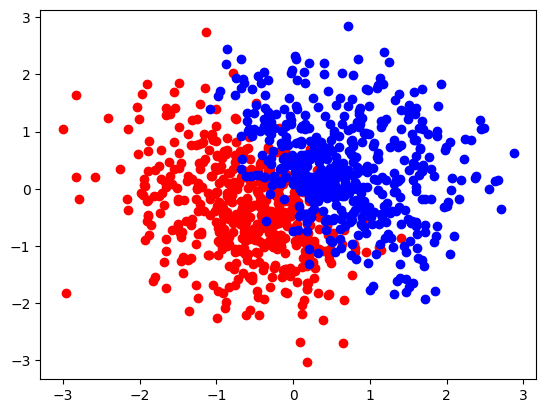

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'b')

In [4]:
lr = logistic_regression.LogisticRegressor()

print(lr.beta)

print("minus log likelihood: ", lr.minus_log_likelihood(X, y))

db = logistic_regression.LogisticRegressor.loss_prime(X, y, lr.beta)
print("db: ", db)

lr.beta = lr.beta - 0.001 * db
print("minus log likelihood: ", lr.minus_log_likelihood(X, y))

[ 0.47101897 -1.7299039 ]
minus log likelihood:  1149.6468638054814
db:  [-267.62886144 -445.44546108]
minus log likelihood:  897.7544634933239


visualisation of loglikehood loss

In [5]:
k = 1000
x1 = np.linspace(-10, 10, k)
x2 = np.linspace(-10, 10, k)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(k):
    for j in range(k):
        beta = np.array([X1[i, j], X2[i, j]])
        weighted_input = X @ beta
        Z[i, j] = np.sum(y * weighted_input - np.log(1 + np.exp(weighted_input)))



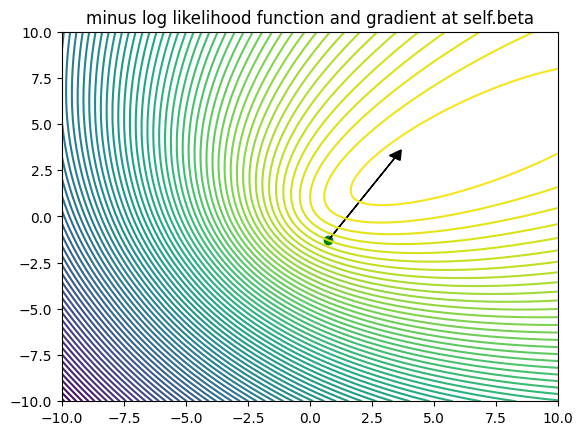

In [6]:

plt.contour(X1, X2, Z, 100)
# add dot for self.beta
plt.scatter(lr.beta[0], lr.beta[1], c = 'g')
# draw arrow for gradient
plt.arrow(lr.beta[0], lr.beta[1], -0.01 * db[0], -0.01 * db[1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.title("minus log likelihood function and gradient at self.beta")
plt.show()

In [16]:
lr.accuracy(X, y)

0.572

In [17]:

print(lr.beta)

print("log likelihood: ", lr.minus_log_likelihood(X, y))

db = logistic_regression.LogisticRegressor.loss_prime(X, y, lr.beta)
print("db: ", db)

lr.beta = lr.beta - 0.001 * db
print("log likelihood: ", lr.minus_log_likelihood(X, y))

[-0.5021674   1.10306417]
log likelihood:  784.3983592130268
db:  [-425.44302083    2.52754925]
log likelihood:  621.3959210586775


In [7]:
lr.fit(X,y, max_num_epoch=500, learning_rate=0.001)
print(lr.beta)
y_hat = lr.predict(X)
print("Accuracy for gd and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [ 0.92556289 -0.92243487]
Epoch 1, solution: [ 1.07234828 -0.61078803]
Epoch 2, solution: [ 1.19069147 -0.34746643]
Epoch 3, solution: [ 1.29074767 -0.12751864]
Epoch 4, solution: [1.37784379 0.0583462 ]
Epoch 5, solution: [1.45586259 0.21466991]
Epoch 6, solution: [1.52749233 0.34894536]
Epoch 7, solution: [1.59471964 0.46481331]
Epoch 8, solution: [1.65741888 0.56709901]
Epoch 9, solution: [1.71670183 0.65854045]
Epoch 10, solution: [1.77443988 0.73903825]
Epoch 11, solution: [1.82910797 0.81187869]
Epoch 12, solution: [1.88105944 0.87851149]
Epoch 13, solution: [1.93178341 0.93825776]
Epoch 14, solution: [1.98073602 0.99280515]
Epoch 15, solution: [2.02718327 1.04482099]
Epoch 16, solution: [2.07374673 1.09135237]
Epoch 17, solution: [2.11810221 1.13495742]
Epoch 18, solution: [2.16101923 1.17611068]
Epoch 19, solution: [2.20243245 1.2145166 ]
Epoch 20, solution: [2.24309196 1.25028896]
Epoch 21, solution: [2.282405  1.2839085]
Epoch 22, solution: [2.32069738 1.31

In [11]:
lr = logistic_regression.LogisticRegressor(descent_algorithm = "adam")
lr.fit(X,y, max_num_epoch=100, learning_rate=0.001, verbose=True)
print("Accuracy for adam algorithm and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [0.71514234 0.10830128]
Epoch 1, solution: [1.2264904  0.48376446]
Epoch 2, solution: [1.62444341 0.79128789]
Epoch 3, solution: [1.9515316  1.02858384]
Epoch 4, solution: [2.21831928 1.21353939]
Epoch 5, solution: [2.45014523 1.37004067]
Epoch 6, solution: [2.6401784  1.50982592]
Epoch 7, solution: [2.80753469 1.63070311]
Epoch 8, solution: [2.95693252 1.73096762]
Epoch 9, solution: [3.09749138 1.81671564]
Epoch 10, solution: [3.21494152 1.89326644]
Epoch 11, solution: [3.32007743 1.97101011]
Epoch 12, solution: [3.42044235 2.03355596]
Epoch 13, solution: [3.51066201 2.08976602]
Epoch 14, solution: [3.60200443 2.14644312]
Epoch 15, solution: [3.68487861 2.19259892]
Epoch 16, solution: [3.75618899 2.23860338]
Epoch 17, solution: [3.82510313 2.2803029 ]
Epoch 18, solution: [3.88310759 2.3218123 ]
Epoch 19, solution: [3.94096803 2.35763626]
Epoch 20, solution: [3.99059681 2.3903049 ]
Epoch 21, solution: [4.04463256 2.42152117]
Epoch 22, solution: [4.09702389 2.45196819

In [12]:
lr = logistic_regression.LogisticRegressor(descent_algorithm = "iwls")
lr.fit(X,y, max_num_epoch=10, batch_size=32, learning_rate=0.001, verbose=True)
print("Accuracy for iwls and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [1.42444238 0.81437928]
Epoch 1, solution: [2.5074966  1.50804914]
Epoch 2, solution: [3.63644052 2.19648832]
Epoch 3, solution: [4.50111716 2.71717925]
Epoch 4, solution: [4.83913305 2.91996937]
Epoch 5, solution: [4.87554213 2.94177722]
Epoch 6, solution: [4.87590551 2.94199464]
Epoch 7, solution: [4.87590554 2.94199466]
Epoch 8, solution: [4.87590554 2.94199466]
Epoch 9, solution: [4.87590554 2.94199466]
Accuracy for iwls and training data:  0.904


In [12]:
lr = logistic_regression.LogisticRegressor(descent_algorithm = "newton")
lr.fit(X,y, max_num_epoch=10, batch_size=32, learning_rate=0.001, verbose=True)
print("Accuracy for newton and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [2.65859355 0.42865723]
Epoch 1, solution: [3.14274267 1.64597823]
Epoch 2, solution: [4.16790467 2.42445395]
Epoch 3, solution: [4.85849666 2.89883403]
Epoch 4, solution: [5.05539593 3.02783775]
Epoch 5, solution: [5.06707278 3.0352602 ]
Epoch 6, solution: [5.06710989 3.03528324]
Epoch 7, solution: [5.06710989 3.03528324]
Epoch 8, solution: [5.06710989 3.03528324]
Epoch 9, solution: [5.06710989 3.03528324]
Accuracy for newton and training data:  0.917


In [3]:
lr = logistic_regression.LogisticRegressor(descent_algorithm = "sgd")
lr.fit(X,y, max_num_epoch=10, batch_size=32, learning_rate=0.001, verbose=True)
print("Accuracy for newton and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [-0.51498645  0.52836368]
Epoch 1, solution: [-0.12346366  0.59859393]
Epoch 2, solution: [0.18962138 0.65387552]
Epoch 3, solution: [0.44081617 0.70027669]
Epoch 4, solution: [0.64731673 0.74375261]
Epoch 5, solution: [0.82083291 0.78512766]
Epoch 6, solution: [0.97014611 0.82496085]
Epoch 7, solution: [1.10086763 0.8629911 ]
Epoch 8, solution: [1.21601893 0.90099261]
Epoch 9, solution: [1.31958559 0.93767206]
Accuracy for newton and training data:  0.903
